In [1]:
import tensorflow as tf
import numpy as np
import os
import skimage

In [2]:
path = "croppedImages/"

num = 8000 #ca 8 000 in folder

dataset = []

for img in range(1,num + 1): 
    img_array = skimage.util.img_as_float32(skimage.io.imread(path + str(img) + ".png"))
    dataset.append(img_array.flatten())

print(len(dataset))

8000


In [3]:
import random

random.shuffle(dataset)

dataset = np.array(dataset)

training = np.array(dataset [0:int(num*0.8)])
testing = np.array(dataset [int(num*0.8):])

print(training.shape)
print(testing.shape)

(6400, 49152)
(1600, 49152)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(16*16*3, input_dim=dataset.shape[1], activation='relu'))
model.add(Dense(16*16*3, activation='relu'))
model.add(Dense(16*16*3, activation='relu'))
model.add(Dense(16*16*3, activation='relu'))
model.add(Dense(training.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(dataset,dataset,batch_size = 64, verbose=1,epochs=50)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
8000/8000 [==============================] - 18s 2ms/sample - loss: 0.0527
Epoch 2/50
8000/8000 [==============================] - 14s 2ms/sample - loss: 0.0281
Epoch 3/50
8000/8000 [==============================] - 14s 2ms/sample - loss: 0.0243
Epoch 4/50
8000/8000 [==============================] - 14s 2ms/sample - loss: 0.0222
Epoch 5/50
8000/8000 [==============================] - 14s 2ms/sample - loss: 0.0212
Epoch 6/50
8000/8000 [==============================] - 14s 2ms/sample - loss: 0.0204
Epoch 7/50
8000/8000 [==============================] - 14s 2ms/sample - loss: 0.0198
Epoch 8/50
8000/8000 [==============================] - 14s 2ms/sample - loss: 0.0192
Epoch 9/50
8000/8000 [==============================] - 14s 2ms/sample - loss: 0.0188
Epoch 10/50
8000/8000 [==============================] - 1

Score neural network


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


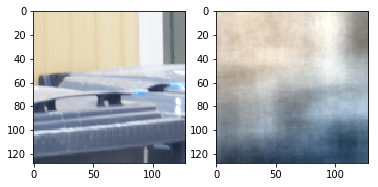

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


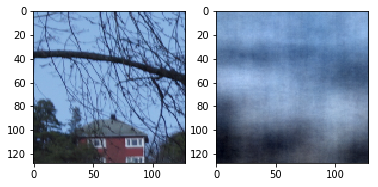

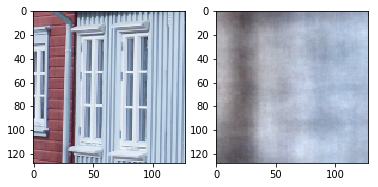

In [6]:
print("Score neural network")
pred = model.predict(testing)

cols,rows = 128,128
for i in range(3):
    predicted = pred[i].reshape(rows,cols,3)
    original = testing[i].reshape(rows,cols,3)   
    
    skimage.io.imshow_collection([original,predicted])
    skimage.io.show()